<a href="https://colab.research.google.com/github/leovaldesz/Atividades-Aprendizagem-de-m-quina/blob/master/Semana%206/Semana6_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Reconhecimento de Flores



*   Dataset com imagens de flores separadas por espécies
*   Objetivo é reconhecer a espécie das flores
*   102 espécies de flores (Mas por motivos de teste não usarei todas)
*   [dataset](https://www.kaggle.com/lenine/flower-102diffspecies-dataset)








In [83]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## 2. Importanto bibliotecas

In [84]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # opencv
import matplotlib.pyplot as plt
import os

from sklearn.metrics import accuracy_score

from keras import preprocessing
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop

## 3. Lendo Imagens

#### Lendo 1 imagem

In [85]:
#lendo imagem
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/datasets/flower_data/train/1/image_06773.jpg')

In [86]:
img.shape

(500, 606, 3)

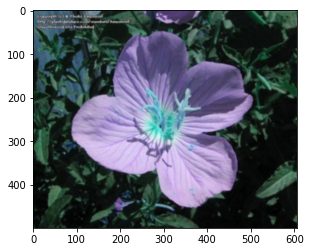

In [87]:
#plotando imagem
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [88]:
#transformando imagem em matriz de pixels
pixels = np.asarray(img)
pixels

array([[[ 61, 100, 128],
        [ 66, 106, 131],
        [ 71, 111, 136],
        ...,
        [ 37,  72,  46],
        [  6,  38,  13],
        [  0,  23,   0]],

       [[ 64, 101, 129],
        [ 67, 107, 132],
        [ 73, 111, 135],
        ...,
        [ 59,  96,  70],
        [ 40,  75,  49],
        [ 32,  64,  39]],

       [[ 62,  97, 123],
        [ 65, 102, 128],
        [ 73, 109, 133],
        ...,
        [ 74, 115,  88],
        [ 65, 104,  78],
        [ 64, 101,  75]],

       ...,

       [[ 28,  55,  35],
        [ 32,  59,  39],
        [ 35,  57,  39],
        ...,
        [  4,   4,   4],
        [  6,   6,   6],
        [  7,   7,   7]],

       [[  0,  25,   5],
        [ 19,  46,  26],
        [ 42,  64,  46],
        ...,
        [  4,   4,   4],
        [  6,   6,   6],
        [  7,   7,   7]],

       [[  0,  16,   0],
        [ 17,  44,  24],
        [ 48,  70,  52],
        ...,
        [  4,   4,   4],
        [  6,   6,   6],
        [  7,   7,   7]]

### Lendo Todas as imagens

In [89]:
input_dir = '/content/drive/My Drive/Colab Notebooks/datasets/flower_data/'

In [90]:
#tipo = train ou test
classes = {'1':0,'2':1,'3':2,'4':3,'5':4,'6':5,'7':6,'8':7,'9':8,'10':9}
def ler_dataset(tipo):
  X = []
  y = []
  qtd = 1000 if tipo == 'train' else 200
  #para cada pasta
  for pasta in os.listdir(input_dir+tipo+'/'):
    print(pasta)
    #para cada imagem na pasta
    for img_file in os.listdir(input_dir+tipo+'/'+pasta+'/')[:qtd]:
      #leia a imagem
      img = cv2.imread(input_dir+tipo+'/'+pasta+'/'+img_file)
      #transforme imagem em array de pixels e salve na lista de imagens
      X.append(img)
      #guarde a classificação da imagem
      y.append(classes[pasta])
  X = np.asarray(X)
  y = np.asarray(y)
  return X,y

In [91]:
X_treino,y_treino = ler_dataset('train')

1
3
2
8
7
5
10
4
6
9


In [92]:
X_treino.shape

(427,)

In [93]:
y_treino.shape

(427,)

In [94]:
X_teste,y_teste = ler_dataset('valid')

6
2
7
8
5
3
4
10
1
9


In [95]:
X_teste.shape

(43,)

In [96]:
y_teste.shape

(43,)

In [97]:
#transformando labels de numérico para categórico
y_treino = to_categorical(y_treino, num_classes = 10)
y_teste = to_categorical(y_teste, num_classes = 10)

## 4. Re-escala dos Dados

In [108]:
X_treino = X_treino/255
X_teste = X_teste/255

## 5. Definindo CNN

In [99]:
#definição do modelo
model = Sequential()

# 2 camadas de convolução de 32 filtros + Max pooling [2,2]
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (48,48,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 camadas de convolução de 64 filtros + Max pooling [2,2]
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# 2 camadas de convolução de 128 filtros + Max pooling [2,2]
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

#  2 camadas fully conected 
model.add(Flatten())#converte os mapas de ativação finais para um veter de 1 dimensão
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(7, activation = "softmax"))

In [100]:
# Definindo o algoritmo otmizador
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [101]:
# Compilando o modelo
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [102]:
# Descrição do modelo
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 48, 48, 32)        2432      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 48, 48, 32)        25632     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 48, 48, 32)        25632     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 24, 24, 64)       

In [113]:
# treinamento do modelo
model.fit(X_treino, y_treino, epochs=1,verbose = 1)

ValueError: ignored

Não consegui fazer o treinamento, tentei dar reshape, transformar os tipos e nada deu certo.

In [ ]:
model.evaluate(X_teste,y_teste)